# Árbol de decisión de clasificación

Dado que el análisis exploratorio de este set de datos ya se realizó en las actividades anteriores ahora solo se procede directo a la creación, entrenamiento y validación del modelo y su correspondiente evaluación.

In [1]:
# Carga de datos  
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
import pandas as pd
import numpy as np
from sklearn import datasets
dataset = datasets.load_breast_cancer()
data_frame = pd.DataFrame(np.c_[dataset['data'], dataset['target']],
                  columns= np.append(dataset['feature_names'], ['target']))
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Preparación de los datos

In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
# 0 = Malinga , 1 = Benigna
print(data_frame.groupby('target').size())

target
0.0    212
1.0    357
dtype: int64


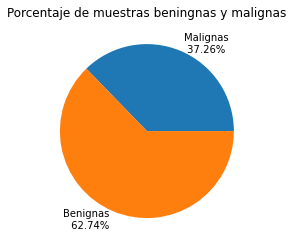

In [4]:
import matplotlib.pyplot as plt
# Gráfico de tortas del porcentaje de muestras benignas y mañignas
# Contando las benignas
clases = np.array([data_frame[data_frame.target == 0.0].shape[0], data_frame[data_frame.target == 1.0].shape[0]])

# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Malignas\n ' + labels[0]
labels[1] = 'Benignas\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de muestras beningnas y malignas')
plt.show()

In [5]:
# Selecciona las variables
X = data_frame.drop(["target"],axis=1)

# Rescata la etiqueta
y = data_frame.target

## Creación del modelo, entrenamiento, validación y evaluación

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

modelo = DecisionTreeClassifier(random_state=29)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print('Precisión del modelo:', modelo.score(X_test, y_test))
print('Accuracy del modelo:', accuracy_score(y_test, y_pred))

Precisión del modelo: 0.8771929824561403
Accuracy del modelo: 0.8771929824561403


## Representación gráfica del árbol

In [8]:
cn = ['Maligna','Benigna']

Profundidad del árbol: 6
Número de nodos terminales: 19


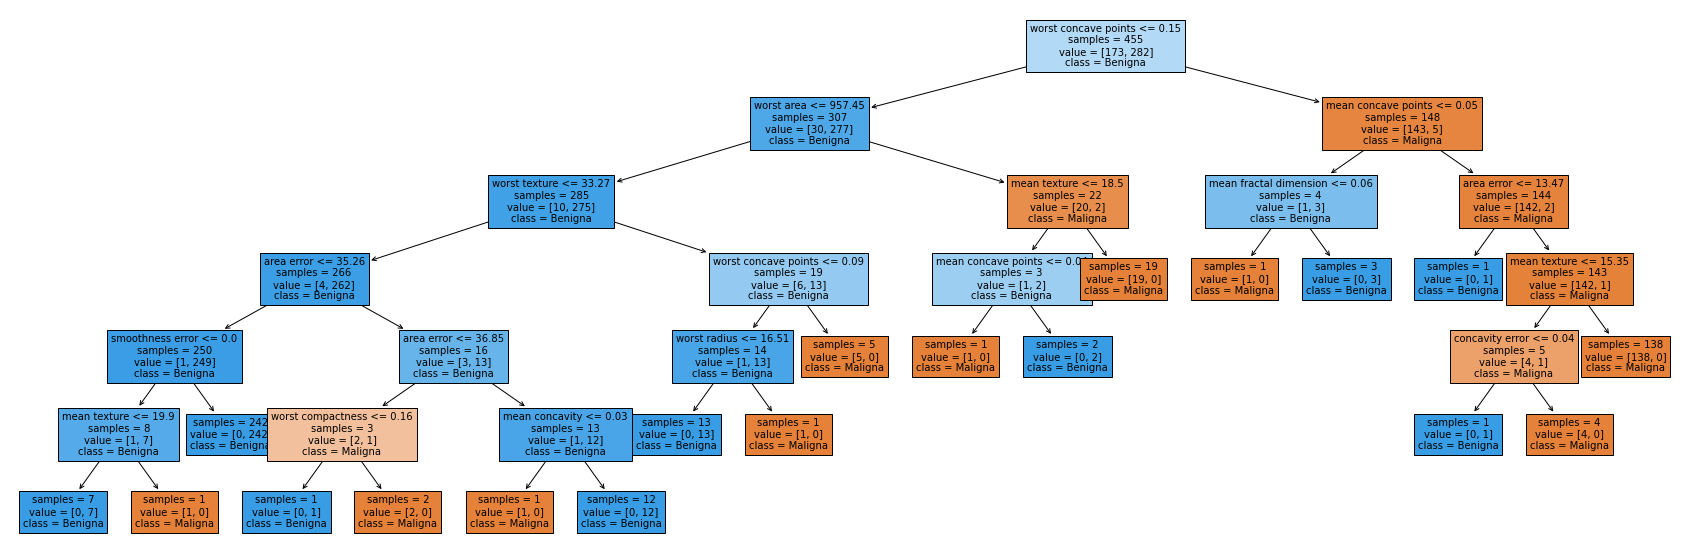

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data_frame.drop(columns = ["target"]).columns,
            class_names   = cn,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [11]:
fig.savefig("arbol_class.jpg")

In [12]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[32  7]
 [ 7 68]]


In [13]:
#Cantidad de Predicciones Malignas 
len(y_pred[y_pred[:]==0])

39